# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "..\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = "..\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_complete['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].values
duplicate_id

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_all = mouse_study_complete[mouse_study_complete['Mouse ID'] == duplicate_id[0]]
duplicate_id_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete.drop(mouse_study_complete[mouse_study_complete['Mouse ID'] == duplicate_id[0]].index, inplace=True)

mouse_study_complete_clean = pd.DataFrame(mouse_study_complete)
mouse_study_complete_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_complete_clean['Mouse ID'].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_tumor_groupby = mouse_study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_tumor_volume = drug_regimen_tumor_groupby.mean()
median_tumor_volume = drug_regimen_tumor_groupby.median()
var_tumor_volume = drug_regimen_tumor_groupby.var()
std_tumor_volume = drug_regimen_tumor_groupby.std()
sem_tumor_volume = drug_regimen_tumor_groupby.sem()

summary_stat_tumor_volume = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume
                                          , 'Median Tumor Volume': median_tumor_volume
                                          , 'Tumor Volume Variance': var_tumor_volume
                                          , 'Tumor Volume Std. Dev.': std_tumor_volume
                                          , 'Tumor Volume Std. Err.': sem_tumor_volume})
summary_stat_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

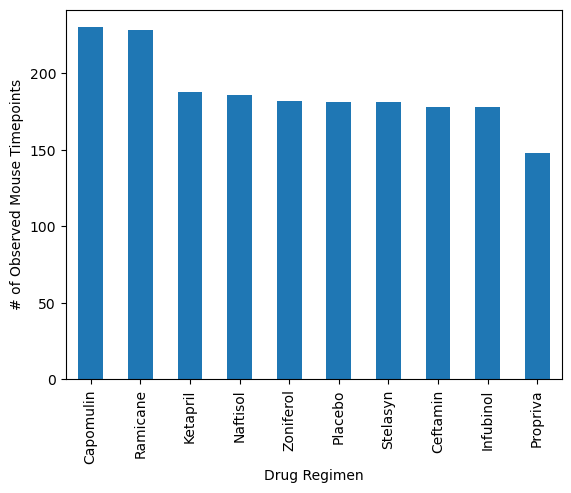

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_groupby = mouse_study_complete_clean.groupby('Drug Regimen')
drug_regimen_groupby['Timepoint'].count().sort_values(ascending=False).plot(kind='bar', ylabel='# of Observed Mouse Timepoints')

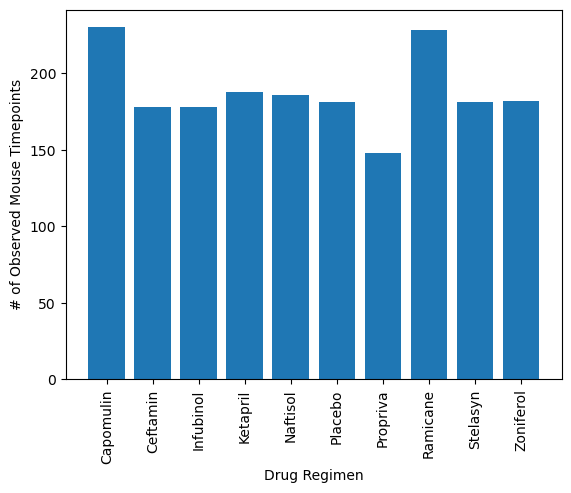

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = list(drug_regimen_groupby['Timepoint'].count())
x_axis = np.arange(len(drug_regimen_groupby))

plt.bar(x_axis, timepoints)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen_groupby['Timepoint'].indices.keys(), rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

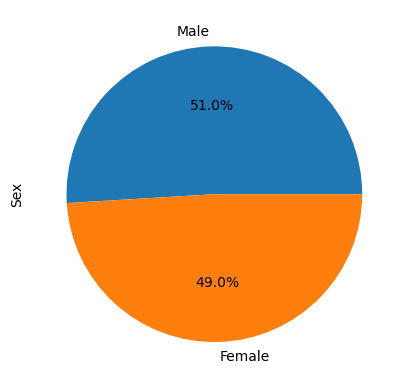

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_complete_clean['Sex'].value_counts().plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')

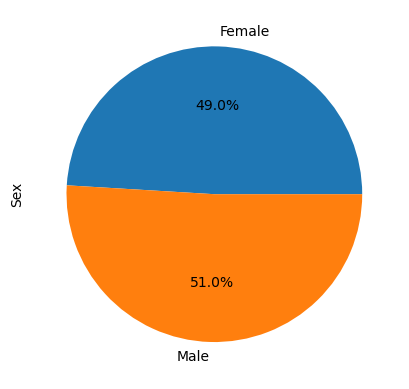

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mouse_study_complete_clean['Sex'].value_counts(sort=False)
labels = mouse_study_complete_clean['Sex'].unique()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_groupy = mouse_study_complete_clean.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint_groupy.reset_index())
last_timepoint_df.rename(columns={'Timepoint': 'Max Timepoint'}, inplace=True)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
outlier_df = pd.merge(mouse_study_complete_clean, last_timepoint_df, how='left', on='Mouse ID')
outlier_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [188]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_volume = outlier_df.loc[(outlier_df['Drug Regimen'] == treatment) & (outlier_df['Timepoint'] == outlier_df['Max Timepoint'])]['Tumor Volume (mm3)']
    # add subset 
    tumor_volume.append(last_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = last_tumor_volume.quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)

    for outlier_check in last_tumor_volume:
        if ((outlier_check < lower) | (outlier_check > upper)):
            print(f"{treatment}'s potential outliers: {outlier_check}")


Infubinol's potential outliers: 36.3213458


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
